데이터 전처리(준비) -> 알고리즘 선택(지도, 비지도, 강화) -> 모델 학습 
-> 모델 검증/평가(underfitting, 평가지표등) -> 알고리즘/데이터수정(문제발생시 데이터 전처리부터)
- 회귀(Regression) : x축에 따라 y값이 어떻게 나올지
		- 설탕 섭취량에 따른 몸무게의 변화
		- 수면시간에 따른 일의 만족도
		- 맥주 구매에 따른 기저귀 구매 비율
        - 자동차 속도에 따른 충돌 시 사망 확률

In [2]:
# 데이터 전처리
# 문자열을 못받으므로 숫자로 value들을 바꿔야함
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/JG/abangers/StudentsPerformance.csv") 
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [73]:
print("="*20,"\n",df['race/ethnicity'].value_counts())
print("="*20,"\n",df['parental level of education'].value_counts())
print("="*20,"\n",df['lunch'].value_counts())
print("="*20,"\n",df['test preparation course'].value_counts())

 group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
 some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
 standard        645
free/reduced    355
Name: lunch, dtype: int64
 none         642
completed    358
Name: test preparation course, dtype: int64


In [117]:
for i in range(5):
    c = df.iloc[:,[i]]
    print(c)

     gender
0    female
1    female
2    female
3      male
4      male
..      ...
995  female
996    male
997  female
998  female
999  female

[1000 rows x 1 columns]
    race/ethnicity
0          group B
1          group C
2          group B
3          group A
4          group C
..             ...
995        group E
996        group C
997        group C
998        group D
999        group D

[1000 rows x 1 columns]
    parental level of education
0             bachelor's degree
1                  some college
2               master's degree
3            associate's degree
4                  some college
..                          ...
995             master's degree
996                 high school
997                 high school
998                some college
999                some college

[1000 rows x 1 columns]
            lunch
0        standard
1        standard
2        standard
3    free/reduced
4        standard
..            ...
995      standard
996  free/reduced
997  fr

In [13]:
oh_labels.toarray()
exch_nums

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
    

C:\Users\JG\anaconda3\envs\abangers\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JG\anaconda3\envs\abangers\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JG\anaconda3\envs\abangers\lib\site-packages\sklearn\linear_model\_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\JG\anaconda3\envs\abangers\lib\site-packages\sklearn\linear_model\_ridge.py", line 542, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\JG\anaconda3\envs\abangers\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\JG\anaconda3\envs\abangers\lib\site-packages\sklearn\utils\validation

alpha가 0 일때 5 folds의 평균 rmse : nan
alpha가 0 일때 Ridge 회귀계수 : 
[-2.81850727e+14 -2.81850727e+14  1.12081805e+15  1.12081805e+15
  1.12081805e+15  1.12081805e+15  1.12081805e+15  4.60320284e+15
  4.60320284e+15  4.60320284e+15  4.60320284e+15  4.60320284e+15
  4.60320284e+15  2.64460495e+15  2.64460495e+15 -1.73699653e+15
 -1.73699653e+15]
alpha가 0.1 일때 5 folds의 평균 rmse : nan
alpha가 0.1 일때 Ridge 회귀계수 : 
[ 1.47716894 -1.47716894 -3.9373988  -1.59974845 -0.07643769  1.50431486
  4.10927007  0.63754324  3.91525275 -4.08343474  3.84901098  0.12546911
 -4.44384133 -4.45508587  4.45508587  3.98364227 -3.98364227]


C:\Users\JG\anaconda3\envs\abangers\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JG\anaconda3\envs\abangers\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JG\anaconda3\envs\abangers\lib\site-packages\sklearn\linear_model\_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\JG\anaconda3\envs\abangers\lib\site-packages\sklearn\linear_model\_ridge.py", line 542, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\JG\anaconda3\envs\abangers\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\JG\anaconda3\envs\abangers\lib\site-packages\sklearn\utils\validation

alpha가 1 일때 5 folds의 평균 rmse : nan
alpha가 1 일때 Ridge 회귀계수 : 
[ 1.47531612 -1.47531612 -3.89636373 -1.59936024 -0.07949101  1.49678715
  4.07842783  0.64703765  3.88771175 -4.05319427  3.78960138  0.13567519
 -4.40683169 -4.44402111  4.44402111  3.97468278 -3.97468278]
alpha가 10 일때 5 folds의 평균 rmse : nan
alpha가 10 일때 Ridge 회귀계수 : 
[ 1.45494275 -1.45494275 -3.52994731 -1.58710882 -0.10476526  1.42426924
  3.79755215  0.72152116  3.62683674 -3.78081419  3.28476868  0.2191052
 -4.07141758 -4.33686698  4.33686698  3.8866098  -3.8866098 ]
alpha가 100 일때 5 folds의 평균 rmse : nan
alpha가 100 일때 Ridge 회귀계수 : 
[ 1.22184662 -1.22184662 -1.84666926 -1.26619322 -0.15688403  0.94233565
  2.32741085  0.78941346  2.10853663 -2.38157207  1.42397041  0.40306969
 -2.34341812 -3.50444428  3.50444428  3.16313014 -3.16313014]


C:\Users\JG\anaconda3\envs\abangers\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JG\anaconda3\envs\abangers\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JG\anaconda3\envs\abangers\lib\site-packages\sklearn\linear_model\_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\JG\anaconda3\envs\abangers\lib\site-packages\sklearn\linear_model\_ridge.py", line 542, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\JG\anaconda3\envs\abangers\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\JG\anaconda3\envs\abangers\lib\site-packages\sklearn\utils\validation

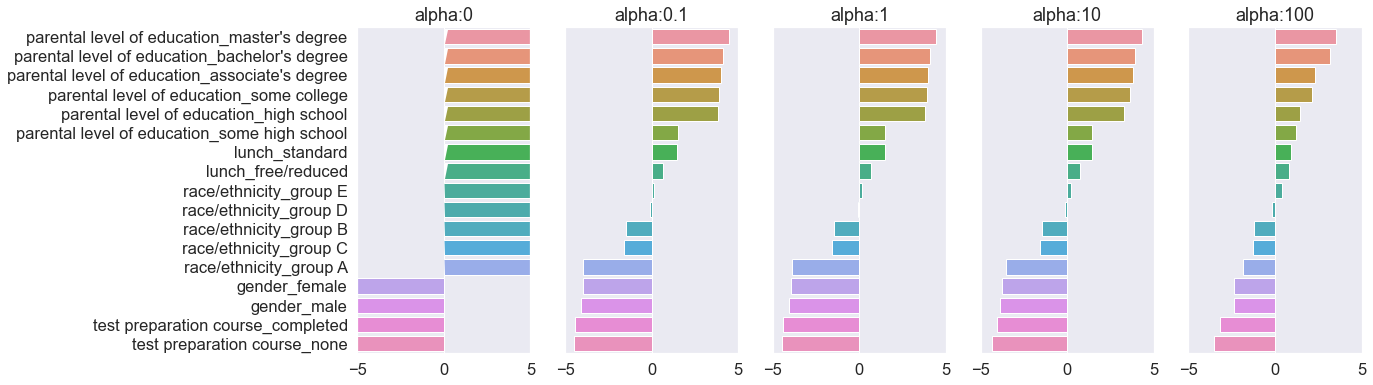

                                                     alpha:0  alpha:0.1  \
gender_female                                  -2.818507e+14   1.477169   
gender_male                                    -2.818507e+14  -1.477169   
race/ethnicity_group A                          1.120818e+15  -3.937399   
race/ethnicity_group B                          1.120818e+15  -1.599748   
race/ethnicity_group C                          1.120818e+15  -0.076438   
race/ethnicity_group D                          1.120818e+15   1.504315   
race/ethnicity_group E                          1.120818e+15   4.109270   
parental level of education_associate's degree  4.603203e+15   0.637543   
parental level of education_bachelor's degree   4.603203e+15   3.915253   
parental level of education_high school         4.603203e+15  -4.083435   
parental level of education_master's degree     4.603203e+15   3.849011   
parental level of education_some college        4.603203e+15   0.125469   
parental level of educati

In [11]:
# 회귀함수를 만들기 위해 구성요소들을 만드는 과정
# y = Wx + b 중 W를 구함 => W를 구하기 위해 alphas = [0, 0.1, 1, 10, 100]설정하고 각각의 rmse로 W를 내가 결정함
# rmse는 함수를 만드는데 사용하는 구성요소가 아닌 최적의 하이퍼 파라미터가 무엇인지 판단을 위한 하나의 지표
# GridSearchCV는 alphas같은 하이퍼 파라미터들을 여러개를 넣어주면 최적의 W를 알아서 찾아내줌


# 데이터 전처리
# 문자열을 못받으므로 숫자로 value들을 바꿔야함
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/JG/abangers/StudentsPerformance.csv") 
##문자열들 숫자화
fnd_col = df.iloc[:,[0,1,2,3,4]] ##Y_target
bi_data = pd.get_dummies(fnd_col) ##X_data




# y_target이 될 'average score' 컬럼 생성
def average_score(data):
    data['average score'] = (data['math score'] + data['writing score'] + data['reading score'])/3
average_score(df)

def cross_val_ridge(x_data, y_tar, dataframe):
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import cross_val_score
    from sklearn.linear_model import Ridge
    
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_tar, test_size=0.2, random_state=156)

    y_target = y_train
    X_data = x_train

    # 하이퍼파라미터 다양하게 바꾸기
    # alphas = [i for i in range(1,100,20)]
    alphas = [0, 0.1, 1, 10, 100]
    coeff_df = pd.DataFrame()

    # 그래프를 그리기 위함
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy import stats
    %matplotlib inline

    fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=len(alphas))
    sns.set(font_scale=1.5)

    # for문을 돌려서 rmse를 확인하여 찾기 => GridSearchCV를 사용하면 자동으로 해줌
    for pos, alpha in enumerate(alphas):
        ridge = Ridge(alpha = alpha)
        ridge.fit(X_data, y_target)
        y_preds = ridge.predict(x_test)

        neg_mse_scores = cross_val_score(ridge, y_preds, y_test, scoring="neg_mean_squared_error", cv=5)
        rmse_scores = np.sqrt(-1 * neg_mse_scores)
        avg_rmse = np.mean(rmse_scores)

        coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
        colname = 'alpha:'+str(alpha)
        coeff_df[colname] = coeff

        print('alpha가 {0} 일때 5 folds의 평균 rmse : {1:.3f}'.format(alpha, avg_rmse))
        print("alpha가 {0} 일때 Ridge 회귀계수 : \n{1}".format(alpha,ridge.coef_))
        print("="*50)

        # 각 alpha별 회귀계수를 DataFrame화 함
        sort_column = 'alpha:'+str(alphas[0])
        coeff = coeff.sort_values(ascending = False)

        # alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정

        axs[pos].set_title(colname)
        axs[pos].set_xlim(-5,5)

        # sns 첫번째 그래프에만 y_label 출력
        if pos != 0:
            ax1=axs[pos]
            ax1.axes.get_yaxis().set_visible(False)
        else:
            ax1=axs[pos]    

        sns.barplot(x=coeff.values, y=coeff.index,ax=ax1)
    plt.show()
    print(coeff_df)

cross_val_ridge(bi_data, df['average score'], df)
    
# # GridSearchCV 사용해보기
# from sklearn.model_selection import GridSearchCV 

# parameters = {'alphas': [0, 0.1, 1, 10, 100]}

# #param_grid의 하이퍼 파라미터들을 3개의 train, test set fold로 나누어서 테스트 수행
# ## refit=True가 default임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴
# grid_ridge = GridSearchCV(ridge, param_grid=parameters, cv=5, refit=True) ##CV:cross validation 교차검증을 의미 cv=3 교차검증을 3번하겠다는 것

# grid_ridge.fit(X_data, y_target)

# #GridSearchCV결과 추출하여 DataFrame으로 변환
# scores_df = pd.DataFrame(grid_ridge.cv_results_) #grid_ridge.fit(X_train, y_train)의 결과가 cv_results_에 저장됨
# scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score','split3_test_score','split4_test_score']]

# print('GridSearchCV 최적 파라미터 :', grid_ridge.best_params_)
# print("GridSearchCV 최고 정확도: {0: .4f}".format(grid_ridge.best_score_))

# #GridSearchCV의 refit으로 이미 학습이 된 estimator을 반환
# estimator = grid_ridge.best_estimator_

# #GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
# pred = estimator.predict(X_test)
# print("테스트 데이터 세트 정확도: {0: .4f}".format(accuracy_score(y_test, pred)))




,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [113]:
X_data

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [17]:
c

,test preparation course
0,none
1,completed
2,none
3,none
4,none
...,...
995,completed
996,none
997,completed
998,completed


In [19]:
c

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [21]:
a

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


            params  mean_test_score  rank_test_score  split0_test_score  \
0  {'alpha': 0.07}         0.943289                1           0.950653   
1   {'alpha': 0.1}         0.941423                2           0.950070   
2   {'alpha': 0.5}         0.922497                3           0.938940   
3     {'alpha': 1}         0.914225                4           0.932764   
4     {'alpha': 3}         0.911038                5           0.930225   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  
0           0.935463           0.946024           0.942871           0.941434  
1           0.932486           0.943916           0.940874           0.939769  
2           0.909123           0.922314           0.919657           0.922452  
3           0.899791           0.913283           0.909562           0.915728  
4           0.896391           0.909766           0.905918           0.912888  
MSE : 12.666, RMSE : 3.559 (=오차값)
Variance score : 0.945(=정확도)


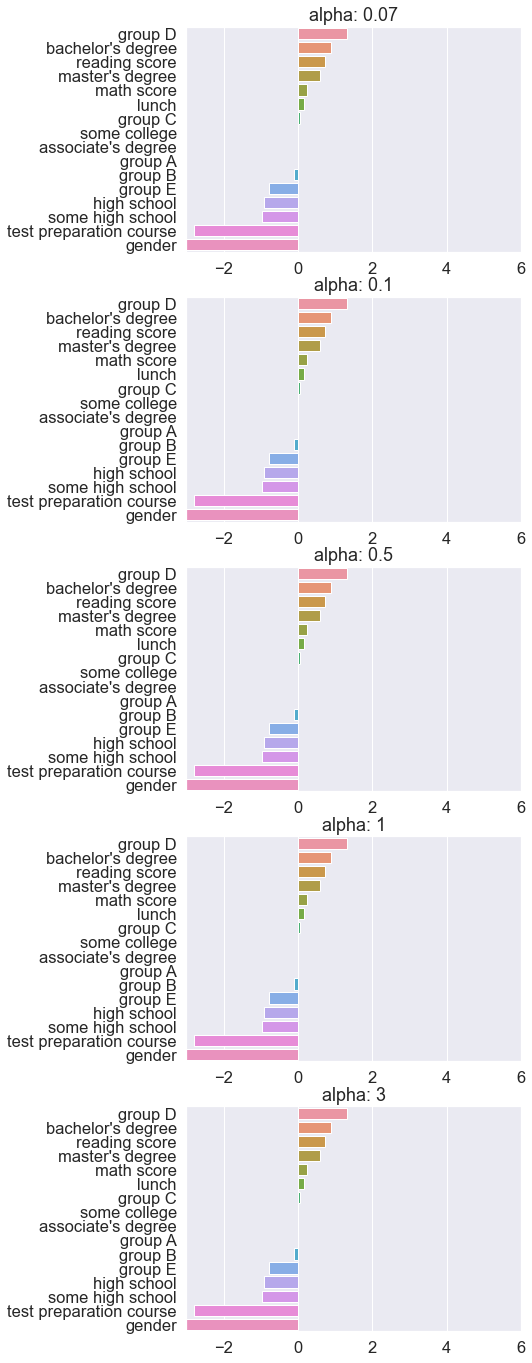

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.linear_model import Lasso
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
sns.set(style='darkgrid', palette='bright', font_scale = 1.5)


# 데이터 불러오기
df = pd.read_csv("C:/Users/JG/abangers/StudentsPerformance.csv") 


from sklearn.preprocessing import LabelEncoder

def average_score(dt):
    return (dt['math score'] + dt['reading score'] + dt['writing score']) / 3

df['average score'] = df.apply(average_score, axis = 1)


# 이진 데이터 레이블 인코딩
# ['gender', 'lunch', 'test preparation course']
encoding_target = ['gender', 'lunch', 'test preparation course']

for items in encoding_target:
    encoder = LabelEncoder()
    encoder.fit(df[items])
    labels = encoder.transform(df[items])
    df[items] = labels

'''
gender : 0 = 여성, 1 = 남성
lunch : 0 = standard, 1 = free/reduced
test preparation course : 0 = none , 1 = completed
'''

# one hot encoding
# ['parental level of education', 'race/ethnicity']
def oh_encoding_concat(column, data):
    updated_data = pd.concat([data, pd.get_dummies(data[column])], axis =1, join = 'inner')
    return updated_data


df = oh_encoding_concat('race/ethnicity', df)
df = oh_encoding_concat('parental level of education', df)



# feature, target 선언

y_target = df['writing score']

x_data = df.drop(['race/ethnicity', 'parental level of education', 'writing score', 'average score'], 
                 axis = 1, inplace = False)


# GridSearchCV 및 회귀계수 시각화 함수 선언
# model = Ridge(), Lasso(), ElasticNet
# Params = [alphas]
# cv = Cross Validataion split

def regression_gridscv_vis(model, y, x, params, cv):

    # GridSearchCV
    gridscv = GridSearchCV(model, param_grid = params, cv = cv, refit = True)

    gridscv.fit(x, y)
    scores_df = pd.DataFrame(gridscv.cv_results_)
    print(scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']])
    
    estimator = gridscv.best_estimator_
    
    pred = estimator.predict(x_data)

    mse = mean_squared_error(y_target, pred)
    rmse = np.sqrt(mse)

    print('MSE : {0:.3f}, RMSE : {1:.3f} (=오차값)'.format(mse, rmse))
    print('Variance score : {0:.3f}(=정확도)'.format(r2_score(y_target, pred)))
    
    # 회귀 계수 시각화
    fig, axs = plt.subplots(figsize = (6,24), nrows=5, ncols = 1)

    coeff_df = pd.DataFrame()
    
    for pos, alpha in enumerate(params['alpha']):
        coeff = pd.Series(data=estimator.coef_, index = x_data.columns)
        colname = 'alpha: '+str(alpha)
        coeff_df[colname] = coeff
        
        coeff = coeff.sort_values(ascending = False)
        axs[pos].set_title(colname)
        axs[pos].set_xlim(-3, 6)
        sns.barplot(x = coeff.values, y = coeff.index, ax=axs[pos])
    plt.show
    
model = ElasticNet()
params = {'alpha' : [0.07 , 0.1, 0.5, 1, 3]}

regression_gridscv_vis(model, y_target, x_data, params, 5)



In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
plt.style.use('dark_background')
sns.set(style = 'darkgrid', palette = 'bright', font_scale = 1.5)

ap = pd.read_csv('./StudentsPerformance.csv')

ap = ap.rename(columns = {'race/ethnicity': 'race', 'parental level of education' : 'parent_edu', 'test preparation course' : 'prep', 'math score': 'math', 'reading score': 'reading', 'writing score': 'writing'})
ap.head()

for i in range(5):
    feature = ap['{}'.format(ap.columns[i])]

    encoder = LabelEncoder()
    encoder.fit(feature)
    labels = encoder.transform(feature)

    # 2차원 데이터로 변환
    labels = labels.reshape(-1, 1)

    # 원-핫 인코딩을 적용
    oh_encoder = OneHotEncoder()
    oh_encoder.fit(labels)
    oh_labels = oh_encoder.transform(labels)  # .fit_transform(labels) 매서드로도 가능
#     print(oh_labels)
    print('원-핫 인코딩 데이터')
    print(oh_labels.toarray()[:2])
#     print('원-핫 인코딩 데이터 차원')
#     print(oh_labels.shape)
    
    # 
    oh_encoded = pd.DataFrame.sparse.from_spmatrix(oh_labels)
    oh_encoded = oh_encoded.rename(columns = {0: '{}-1'.format(ap.columns[i]), 1 : '{}-2'.format(ap.columns[i]), 2: '{}-3'.format(ap.columns[i]), 3: '{}-4'.format(ap.columns[i]), 4: '{}-5'.format(ap.columns[i]), 5: '{}-6'.format(ap.columns[i])})
    ap = pd.concat([ap, oh_encoded], axis = 1)    
#     print(ap)
#     break
#     ap['{}'.format(ap.columns[i])] = oh_labels.toarray()  #todense()도 가능

ap = ap.drop(['gender', 'race', 'parent_edu', 'lunch', 'prep'], axis = 1)

ap.head()

data = ap[['gender', 'race', 'parent_edu', 'lunch', 'prep']]

encoded = pd.get_dummies(data)

encoded

# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4*2개의 ax를 가짐 
fig, axs = plt.subplots(figsize = (25, 10), ncols = 2, nrows = 1, squeeze = False)
lm_features = ap.columns[:2]
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i % 2
    # 사본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x = feature, y = 'writing', data = ap, ax = axs[row][col])

# 파이프라인 
train_x = ap.drop(['writing'], axis = 1)
train_y = ap.writing

x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.2, random_state = 156)

# Linear Regression OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(x_train, y_train)
y_preds = lr.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance Score : {0:.3f}'.format(r2_score(y_test, y_preds)))

print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_, 1))

# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. Index가 컬럼명임에 유의

coeff = pd.Series(data = np.round(lr.coef_, 1), index = x_train.columns)
coeff.sort_values(ascending = False)

# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    # cross_val_score을 이용하여 5 folds의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, train_x, train_y, scoring = 'neg_mean_squared_error', cv = 5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha {0}일 때 5 folds의 평균 RMSE :{1:.3f}'.format(alpha, avg_rmse))

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_x , train_y)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=train_x.columns )
    colname = 'alpha: '+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

# 반환된 coeff_df를 첫뻔째 컬럼순으로 내림차순 정렬
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha: ' + str(ridge_alphas[0])
coeff_df.sort_values(by= sort_column, ascending = False)

ridge.coef_

from sklearn.linear_model import Lasso, ElasticNet

# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함
for alpha in alphas:
    lasso = Lasso(alpha = alpha, tol = 0.001, max_iter = 10000)  # tol은 early_stoppage 혹은 LearningRateScheduler의 역할
    
    # cross_val_score을 이용하여 5 folds의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(lasso, train_x, train_y, scoring = 'neg_mean_squared_error', cv = 5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha {0}일 때 5 folds의 평균 RMSE :{1:.3f}'.format(alpha, avg_rmse))

lasso.coef_  # <- alpha 100일 때의 회귀 계수값들

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    lasso = Lasso(alpha = alpha)
    lasso.fit(train_x , train_y)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=lasso.coef_ , index=train_x.columns )
    colname = 'alpha: '+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

# 반환된 coeff_df를 첫뻔째 컬럼순으로 내림차순 정렬
lasso_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha: ' + str(lasso_alphas[0])
coeff_df.sort_values(by= sort_column, ascending = False)

lr = LinearRegression()

# cross_val_score()로 5 Fold 셋으로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, train_x, train_y, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring = 'neg_mean_squared_error')로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print(' 5 folds 의 개별 RMSE : {}'.format(np.round(avg_rmse)))